# Dardar - Lidar comparison 

## Libraries

In [1]:
from scipy import misc
import numpy as np
import pylab
import glob
import time
from calendar import timegm
#####Load font format

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
        
pylab.rc('font', **font) 

#Function to read Dardar stats
def read_data(filename):
    txt1 = open(filename,"r")

    header = txt1.readline()

    prob_any = []
    h_any = []

    for l in txt1:
        prob_any.append(float(l.split(",")[0]))
        h_any.append(float(l.split(",")[1]))
    
    prob_any = np.array(prob_any)
    h_any = np.array(h_any)
    
    return [prob_any,h_any]

## Reading Dardar stats

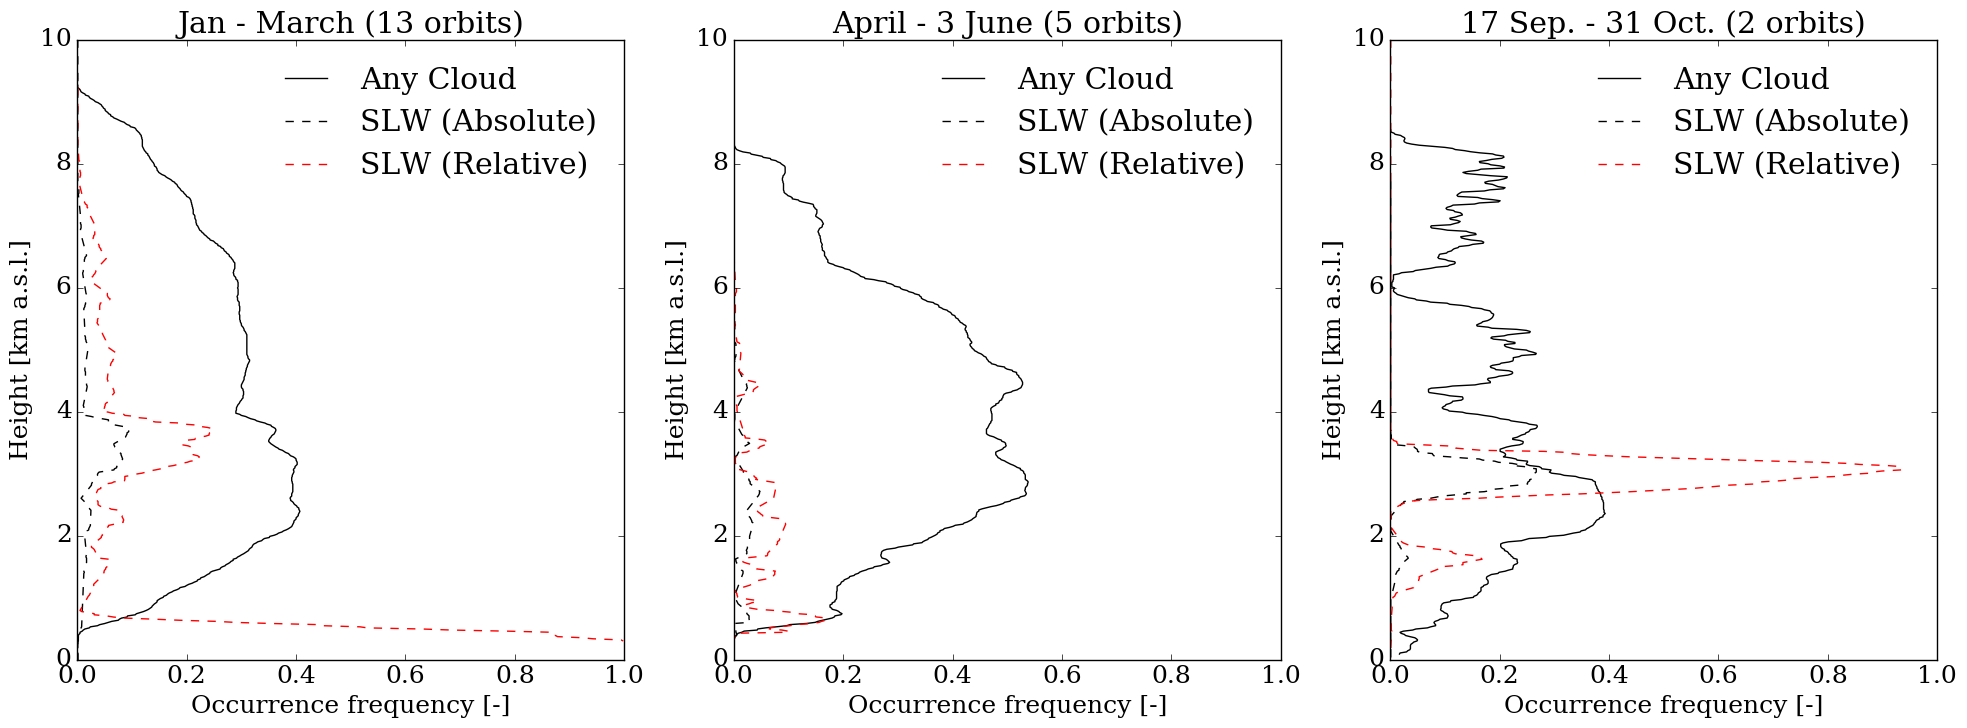

In [2]:
path = "C:/Users/duran/Documents/PhD/Results/Lidar/Caliops/"

fig = pylab.figure(figsize=(24,8))

ax = fig.add_subplot(1,3, 1)

prob_any, h_any = read_data(path + "2017_Jan-March_100m_anyCloud.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_Jan-March_100m_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_Jan-March_100m_SLW_rel.txt")

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("Jan - March (13 orbits)")

ax = fig.add_subplot(1,3, 2)

prob_any, h_any = read_data(path + "2017_April-3drJune_100km_any.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_April-3drJune_100km_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_April-3drJune_100km_SLW_rel.txt")

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("April - 3 June (5 orbits)")

prob_any, h_any = read_data(path + "2017_17Sep-31Oct_100km_any.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_17Sep-31Oct_100km_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_17Sep-31Oct_100km_SLW_rel.txt")

ax = fig.add_subplot(1,3, 3)

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")

pylab.title("17 Sep. - 31 Oct. (2 orbits)")

pylab.show()

## Reading lidar classification

In [3]:
TRES = 10
VRES = 6

path_in = "I:/PHD/Lidar/Processing_V3/Cloud_Classification/10min6bins/"

r = np.loadtxt("I:/PHD/Lidar/Processing_V3/Cloud_mask/R_"+str(TRES)+"min_"+str(VRES)+"bins_masked.dat")

times = []
months = []
days = []
hours = []
clus = []

n = 0
for f in glob.glob(path_in+'*.dat'):
    n = n + 1
    clus0 = np.loadtxt(f)
    if n == 1:
        clus = clus0
    else:
        clus =np.concatenate((clus, clus0), axis=0)
        
    
    year = int(f.split("Class_")[1][0:4])
    month = int(f.split("Class_")[1][4:6])
    day = int(f.split("Class_")[1][6:8])
        
    ndays = int(np.shape(clus0)[0]/145.)
    
    for d in range(ndays):
        
        utc_time = time.strptime(str(year)+"-"+str(month).zfill(2)+"-"+str(day+d).zfill(2)+" "+"00:00:00", "%Y-%m-%d %H:%M:%S")
        epoch_time = timegm(utc_time)    
        
        times = times+list(epoch_time+np.linspace(0,24,145)*3600)
        months = months + [month]*145
        days = days + [day+d]*145
        hours = hours + list(np.linspace(0,24,145))


In [5]:
np.shape(list(np.linspace(0,24,145))*5)

(725L,)

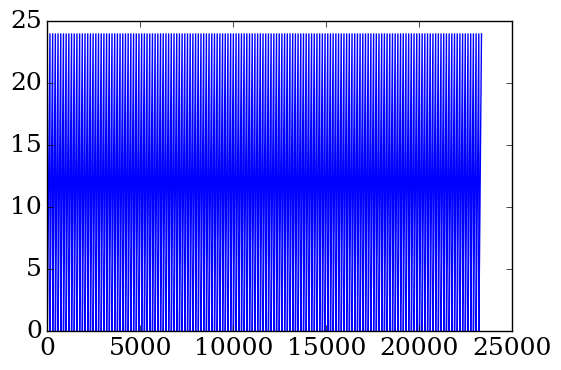

In [4]:
pylab.plot(hours)
pylab.show()

## All stats

C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide


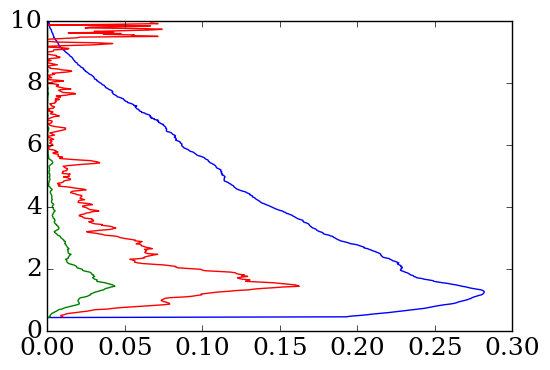

In [6]:
SLW = []
ALL = []
for i in range(np.shape(clus)[1]):
    SLW.append(np.nansum(clus[:,i] == 2))
    ALL.append(np.nansum(clus[:,i] > 0))
    
pylab.plot(np.array(ALL)/float(np.shape(clus)[0]),r)
pylab.plot(np.array(SLW)/float(np.shape(clus)[0]),r)
pylab.plot(1.*np.array(SLW)/np.array(ALL),r)

pylab.show()

## per month

In [209]:
ax = fig.add_subplot(1,3, 2)

prob_any, h_any = read_data(path + "2017_April-3drJune_100km_any.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_April-3drJune_100km_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_April-3drJune_100km_SLW_rel.txt")

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("April - 3 June (5 orbits)")


array([ True,  True,  True, ..., False, False, False], dtype=bool)

C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:55: RuntimeWarning: invalid value encountered in divide
C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:78: RuntimeWarning: invalid value encountered in divide


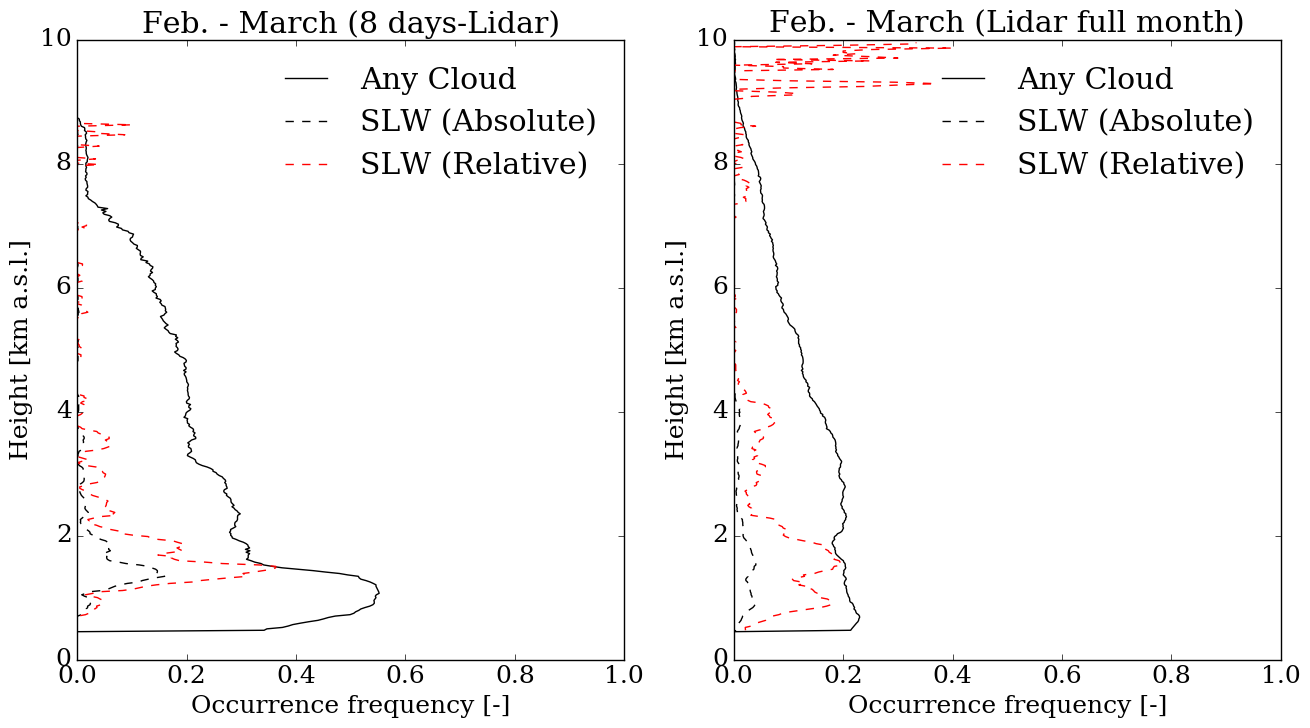

In [7]:
SLW = []
ALL = []

#pix = np.squeeze(np.where(((np.array(months) == 4)  & (np.array(days) == 1) & (np.array(hours) >= 4) & (np.array(hours) < 6)|
#                          (np.array(months) == 4)  & (np.array(days) == 8) & (np.array(hours) >= 4) & (np.array(hours) < 6)|
#                          (np.array(months) == 4)  & (np.array(days) == 15) & (np.array(hours) >= 4) & (np.array(hours) < 6)|
#                          (np.array(months) == 4)  & (np.array(days) == 17) & (np.array(hours) >= 4) & (np.array(hours) < 6)|
#                          (np.array(months) == 4)  & (np.array(days) == 24) & (np.array(hours) >= 4) & (np.array(hours) < 6)
#                         ) & (np.array(hours) < 24)))

t0 = 0
t1 = 24

pix = np.squeeze(np.where(((np.array(months) == 2)  & (np.array(days) == 10) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 2)  & (np.array(days) == 19) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 2)  & (np.array(days) == 26) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 7) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 14) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 16) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 16) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 23) & (np.array(hours) >= t0) & (np.array(hours) < t1)|
                          (np.array(months) == 3)  & (np.array(days) == 30) & (np.array(hours) >= t0) & (np.array(hours) < t1)
                         ) & (np.array(hours) < 24)))


total = np.size(pix)

for i in range(np.shape(clus)[1]):
    SLW.append(np.nansum(clus[pix,i] == 2))
    ALL.append(np.nansum(clus[pix,i] > 0))
    
fig = pylab.figure(figsize=(8*3,8))

'''
ax = fig.add_subplot(1,3, 1)

prob_any, h_any = read_data(path + "2017_April-3drJune_100km_any.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_April-3drJune_100km_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_April-3drJune_100km_SLW_rel.txt")

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
#pylab.title("April - 3 May (5 orbits Dardar < 100km)")
pylab.title("Feb. - March ( 8 orbits Dardar < 100km)")
'''
ax = fig.add_subplot(1,3, 2)

pylab.plot((np.array(ALL)/float(total))[:],r[:], color = "black", label = "Any Cloud")
pylab.plot((np.array(SLW)/float(total))[:],r[:],"--", color = "black", label = "SLW (Absolute)")
pylab.plot((1.*np.array(SLW)/np.array(ALL))[:],r[:],"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("Feb. - March (8 days-Lidar)")

SLW = []
ALL = []

pix = np.squeeze(np.where(np.array(months) == 4))

total = np.size(pix)

for i in range(np.shape(clus)[1]):
    SLW.append(np.nansum(clus[pix,i] == 2))
    ALL.append(np.nansum(clus[pix,i] > 0))


ax = fig.add_subplot(1,3, 3)

pylab.plot((np.array(ALL)/float(total))[:],r[:], color = "black", label = "Any Cloud")
pylab.plot((np.array(SLW)/float(total))[:],r[:],"--", color = "black", label = "SLW (Absolute)")
pylab.plot((1.*np.array(SLW)/np.array(ALL))[:],r[:],"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
#pylab.title("April 2017 (Lidar full month)")
pylab.title("Feb. - March (Lidar full month)")

pylab.show()

C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: invalid value encountered in divide
C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:63: RuntimeWarning: invalid value encountered in divide


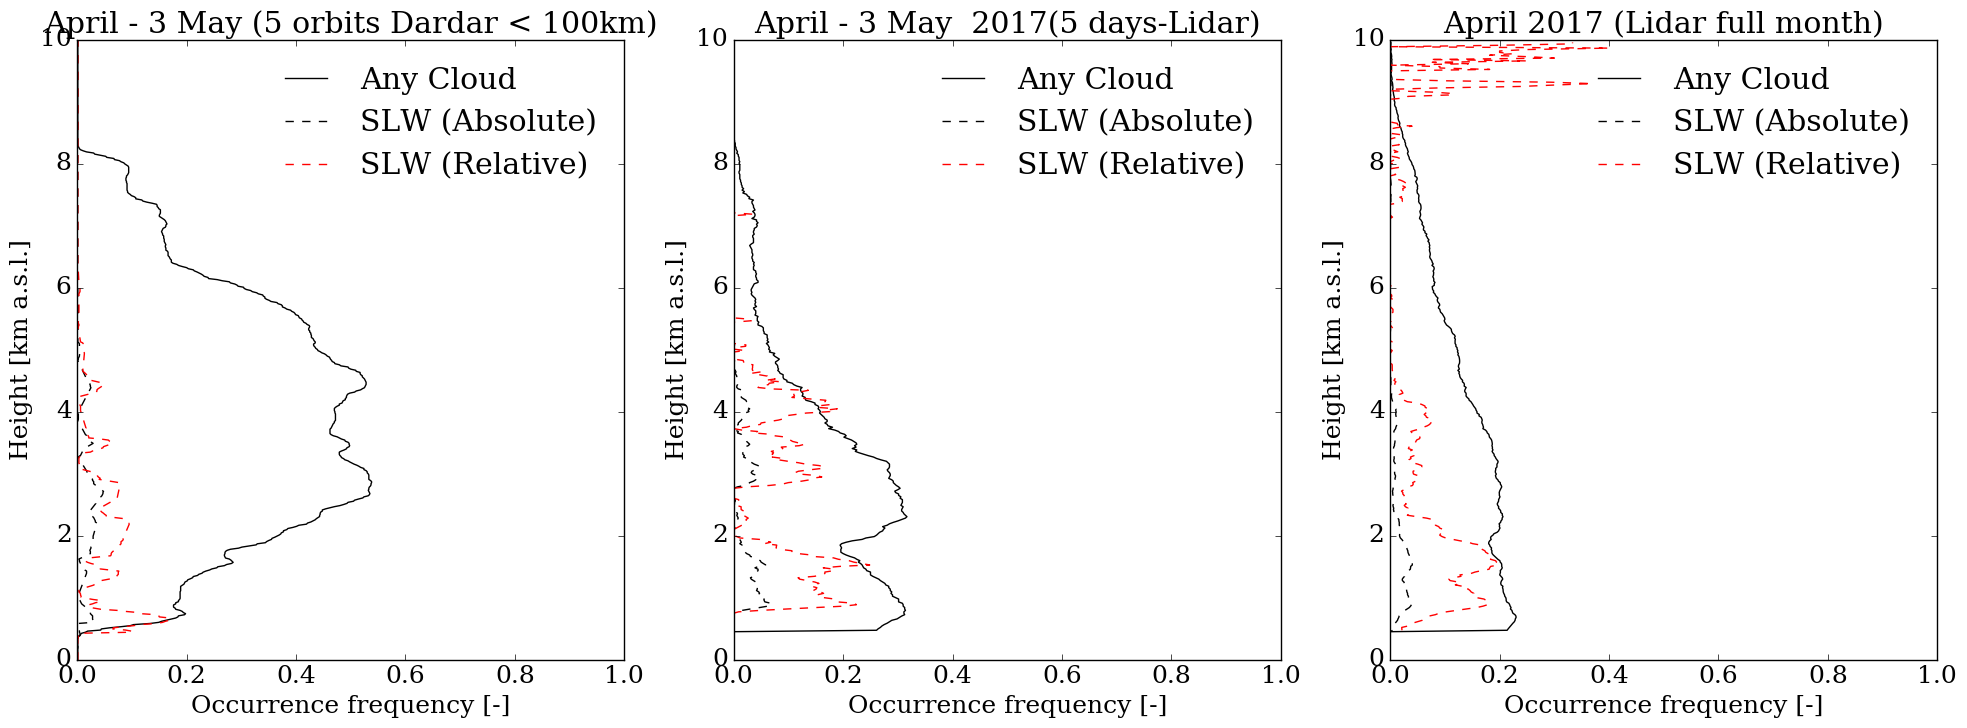

In [228]:
SLW = []
ALL = []

pix = np.squeeze(np.where(((np.array(months) == 4)  & (np.array(days) == 1) & (np.array(hours) < 10)|
                          (np.array(months) == 4)  & (np.array(days) == 8)& (np.array(hours) < 10)|
                          (np.array(months) == 4)  & (np.array(days) == 15)& (np.array(hours) < 10)|
                          (np.array(months) == 4)  & (np.array(days) == 17)& (np.array(hours) < 10)|
                          (np.array(months) == 4)  & (np.array(days) == 24)& (np.array(hours) < 10)
                         ) & (np.array(hours) < 24)))

total = np.size(pix)

for i in range(np.shape(clus)[1]):
    SLW.append(np.nansum(clus[pix,i] == 2))
    ALL.append(np.nansum(clus[pix,i] > 0))
    
fig = pylab.figure(figsize=(8*3,8))


ax = fig.add_subplot(1,3, 1)

prob_any, h_any = read_data(path + "2017_April-3drJune_100km_any.txt")
prob_SLWabs, h_SLWabs = read_data(path + "2017_April-3drJune_100km_SLW_abs.txt")
prob_SLWrel, h_SLWrel = read_data(path + "2017_April-3drJune_100km_SLW_rel.txt")

pylab.plot(prob_any, h_any, color = "black", label = "Any Cloud")
pylab.plot(prob_SLWabs, h_SLWabs,"--", color = "black", label = "SLW (Absolute)")
pylab.plot(prob_SLWrel, h_SLWrel,"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("April - 3 May (5 orbits Dardar < 100km)")

ax = fig.add_subplot(1,3, 2)

pylab.plot((np.array(ALL)/float(total))[:],r[:], color = "black", label = "Any Cloud")
pylab.plot((np.array(SLW)/float(total))[:],r[:],"--", color = "black", label = "SLW (Absolute)")
pylab.plot((1.*np.array(SLW)/np.array(ALL))[:],r[:],"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("April - 3 May  2017(5 days-Lidar)")


SLW = []
ALL = []

pix = np.squeeze(np.where(np.array(months) == 4))

total = np.size(pix)

for i in range(np.shape(clus)[1]):
    SLW.append(np.nansum(clus[pix,i] == 2))
    ALL.append(np.nansum(clus[pix,i] > 0))


ax = fig.add_subplot(1,3, 3)

pylab.plot((np.array(ALL)/float(total))[:],r[:], color = "black", label = "Any Cloud")
pylab.plot((np.array(SLW)/float(total))[:],r[:],"--", color = "black", label = "SLW (Absolute)")
pylab.plot((1.*np.array(SLW)/np.array(ALL))[:],r[:],"--", color = "red", label = "SLW (Relative)")
pylab.axis([0,1,0,10])
pylab.xlabel("Occurrence frequency [-]")
pylab.ylabel("Height [km a.s.l.]")
pylab.legend(frameon = False, loc = "upper right")
pylab.title("April 2017 (Lidar full month)")


pylab.show()




C:\Users\duran\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in divide


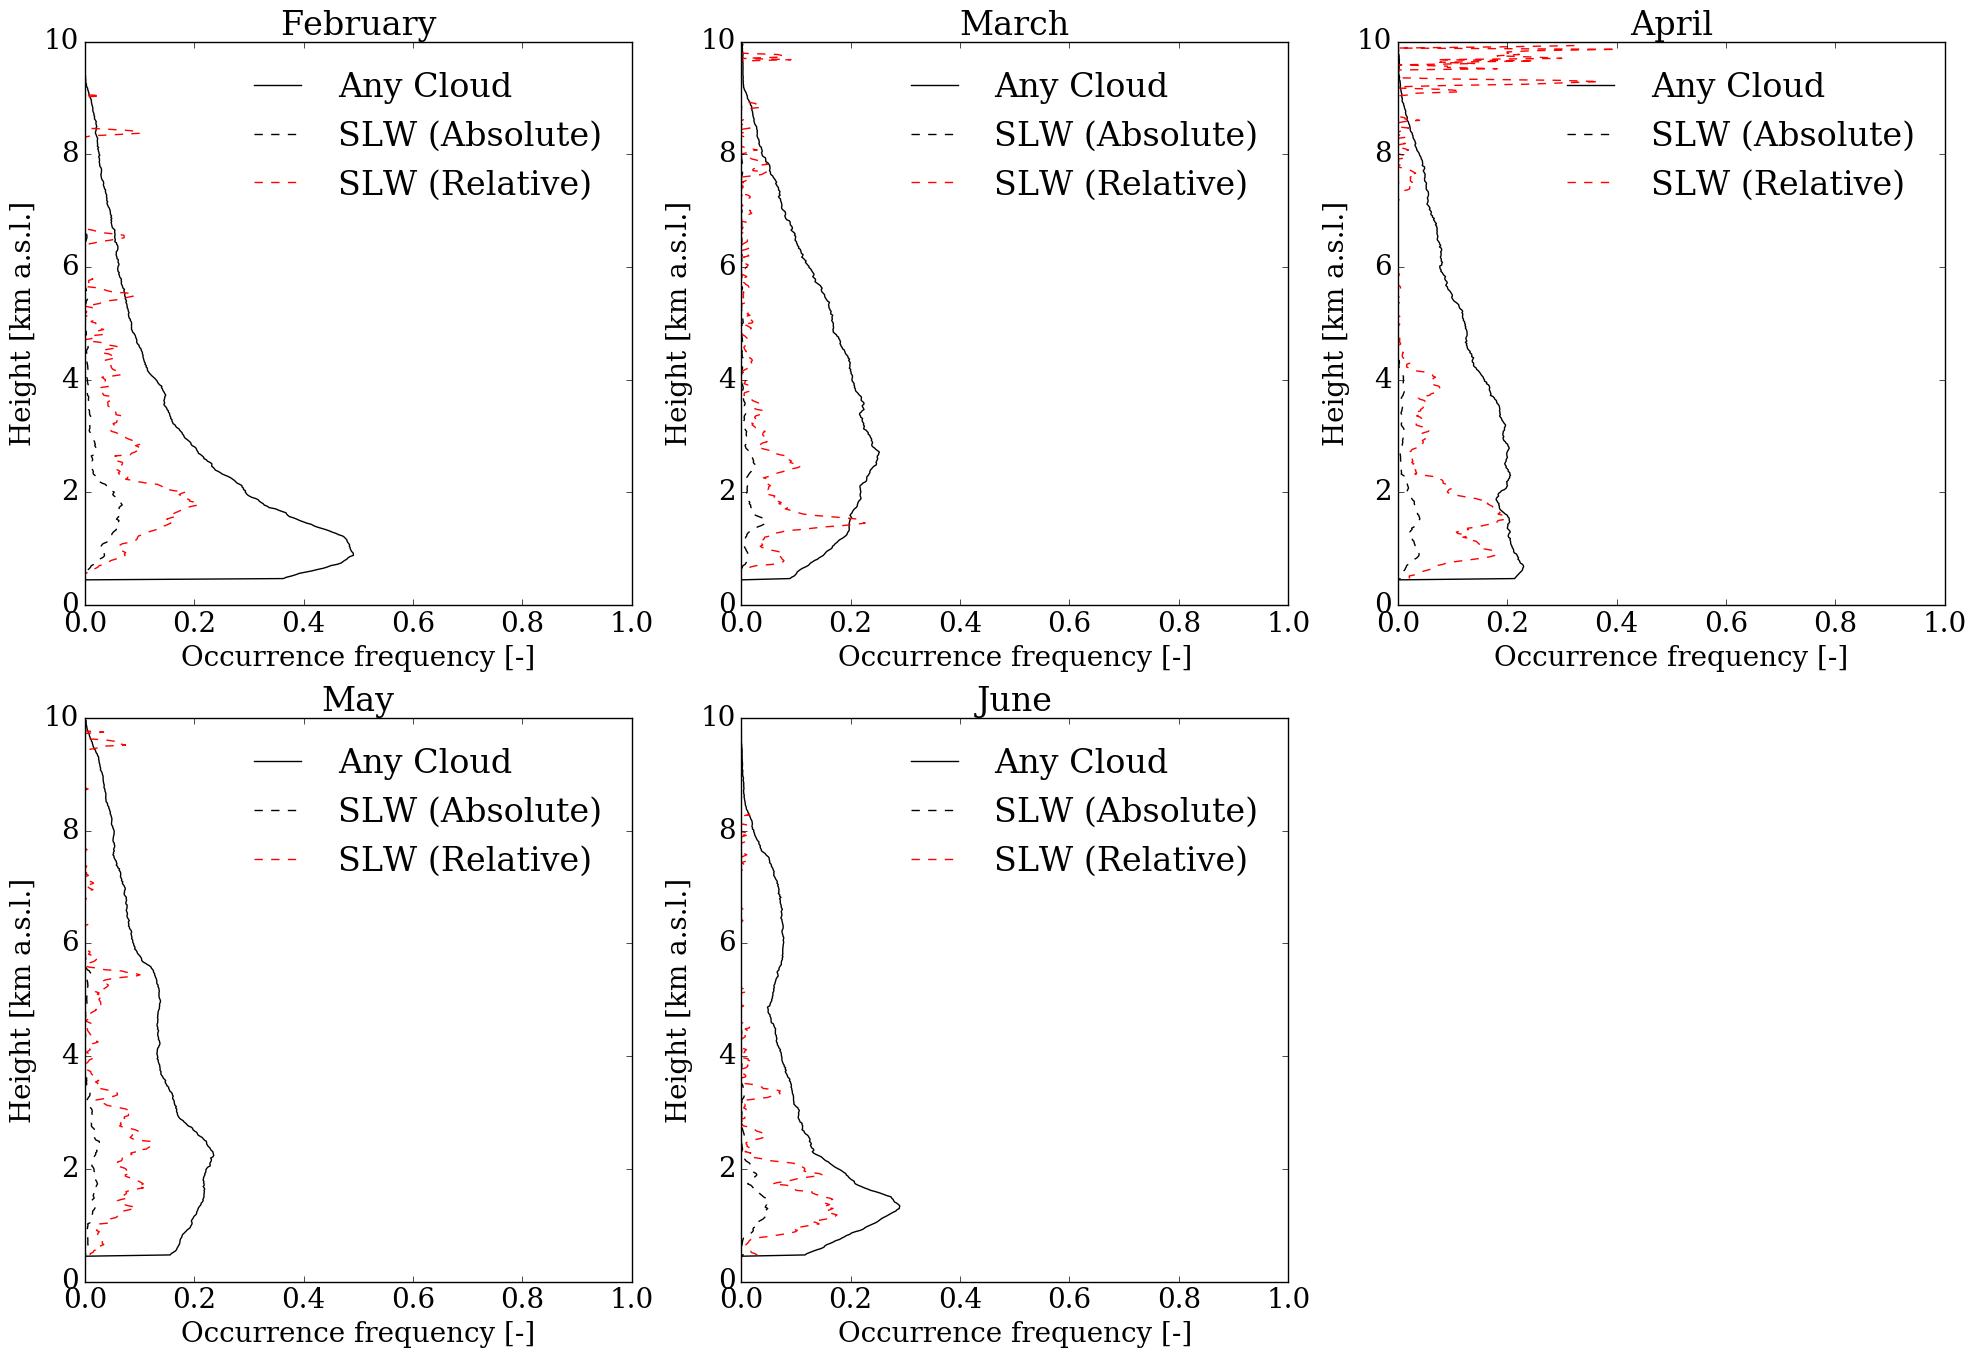

In [225]:
titles = ["February", "March", "April", "May", "June"]
fig = pylab.figure(figsize=(8*3,8*2))

for mon in range(2,7):
    SLW = []
    ALL = []

    pix = np.squeeze(np.where(np.array(months) == mon))

    total = np.size(pix)

    for i in range(np.shape(clus)[1]):
        SLW.append(np.nansum(clus[pix,i] == 2))
        ALL.append(np.nansum(clus[pix,i] > 0))

    ax = fig.add_subplot(2,3, mon-1)

    pylab.plot((np.array(ALL)/float(total))[:],r[:], color = "black", label = "Any Cloud")
    pylab.plot((np.array(SLW)/float(total))[:],r[:],"--", color = "black", label = "SLW (Absolute)")
    pylab.plot((1.*np.array(SLW)/np.array(ALL))[:],r[:],"--", color = "red", label = "SLW (Relative)")
    pylab.axis([0,1,0,10])
    pylab.xlabel("Occurrence frequency [-]")
    pylab.ylabel("Height [km a.s.l.]")
    pylab.legend(frameon = False, loc = "upper right")
    pylab.title(titles[mon-2])
    
pylab.show()